v=0, pos[v]=array([1., 0.])
f: 1.6446724180237031
gradient: [-0.75  0.  ]
hessian: [[4.25 0.  ]
 [0.   1.75]]


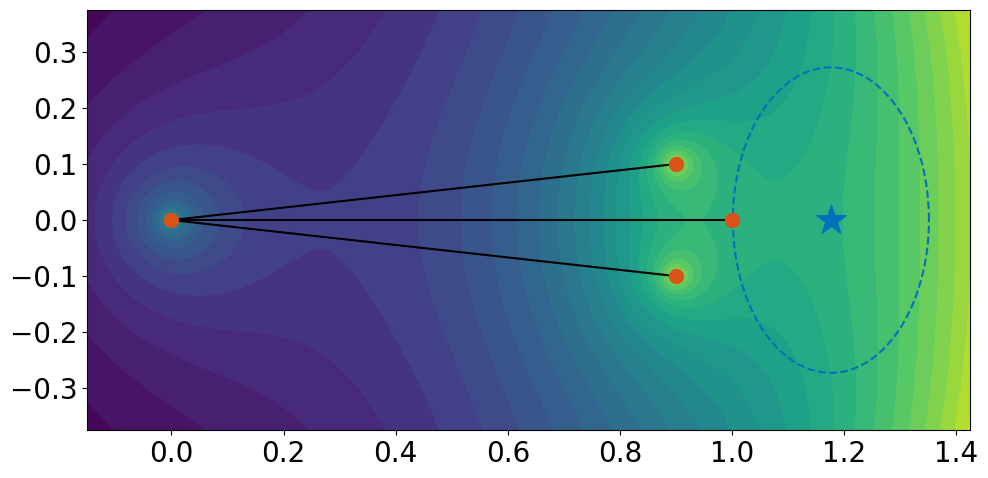

In [3]:
import matplotlib.pyplot as plt
from scipy.linalg import sqrtm
import numpy as np

k = 1 / 2
dx = 0.1
dy = 0.1
pos = np.array([[1.0, 0.0], [0.0, 0.0], [1 - dx, +dy], [1 - dx, -dy]])
data = np.array([1, 0, 0])
n = 4


def f(x, y) -> float:
    dist = np.linalg.norm(np.array([x, y]) - pos[1:], axis=1)
    return np.sum(data * (dist**3) / (3 * k) - k * k * np.log(dist))


def gradient(x, y) -> np.ndarray:
    delta = np.array([x, y]) - pos[1:]
    dist = np.linalg.norm(delta, axis=1)
    return np.sum((data * dist / k - k * k / (dist**2))[:, np.newaxis] * delta, axis=0)


def hessian(x, y) -> np.ndarray:
    delta = np.array([x, y]) - pos[1:]
    dist = np.linalg.norm(delta, axis=1)
    return np.sum(data * dist / k - k * k / (dist**2)) * np.eye(2) + np.einsum(
        "ij,ik->jk",
        (data / (k * dist) + 2 * k * k / (dist**4))[:, np.newaxis] * delta,
        delta,
    )


v = 0
print(f"{v=}, {pos[v]=}")
print("f:", f(*pos[v]))
print("gradient:", gradient(*pos[v]))
print("hessian:", hessian(*pos[v]))

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111)
ax.set_aspect("equal")

sz = 1.5
x = np.linspace(-sz * 0.1, sz * 0.95, 300)
ax.set_xlim(-sz * 0.1, sz * 0.95)
y = np.linspace(-sz / 4, sz / 4, 300)
ax.set_ylim(-sz / 4, sz / 4)
X, Y = np.meshgrid(x, y)
Z = np.zeros_like(X)

for x_idx in range(X.shape[0]):
    for y_idx in range(X.shape[1]):
        Z[x_idx, y_idx] = f(X[x_idx, y_idx], Y[x_idx, y_idx])

plt.contourf(X, Y, Z, levels=30, cmap="viridis")
# plt.colorbar()

for i, j in [[0, 1], [1, 2], [1, 3]]:
    plt.plot([pos[i, 0], pos[j, 0]], [pos[i, 1], pos[j, 1]], color="black")

plt.scatter(pos[:, 0], pos[:, 1], s=100, zorder=10, color="#D95319")

# Compute the ellipsoid
g = gradient(*pos[v])
hess = hessian(*pos[v])
c = 0.13
H_inv = np.linalg.inv(hess)
theta = np.linspace(0, 2 * np.pi, 100)
circle = np.array([np.cos(theta), np.sin(theta)])
x0 = np.linalg.solve(hess, -g)
ellipsoid = np.dot(sqrtm(H_inv * c), circle) + (x0 + pos[v]).reshape(2, 1)

# Plot
plt.plot(
    ellipsoid[0, :], ellipsoid[1, :], label="Ellipsoid", linestyle="--", color="#0072BD"
)

# plot a star at the minimum
plt.scatter(
    (x0 + pos[v])[0], (x0 + pos[v])[1], s=500, zorder=10, color="#0072BD", marker="*"
)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

# if mode <= 1:
#     forLatex += f"{pos[0][0]}/{pos[0][1]}/{pos[1][0]}/{pos[1][1]}/{pos[2][0]}/{pos[2][1]}/{pos[3][0]}/{pos[3][1]}/{pos[4][0]}/{pos[4][1]}/{pos[v][0]+h[0]}/{pos[v][1]+h[1]}/0,\n"
# else:
#     forLatex += f"{pos[1][0]}/{pos[1][1]}/{pos[0][0]}/{pos[0][1]}/{pos[2][0]}/{pos[2][1]}/{pos[3][0]}/{pos[3][1]}/{pos[4][0]}/{pos[4][1]}/{pos[v][0]+h[0]}/{pos[v][1]+h[1]}/0,\n"

plt.tight_layout()
plt.savefig("whyRSNfail1.pdf")
plt.show()

# forLatex = forLatex.replace(".0/", "/")
# print(forLatex[:-2])